# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [42, 200, 380]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10850,7555,14961,188,6899,46
1,3067,13240,23127,3941,9959,731
2,28257,944,2146,3881,600,270


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

A sample that has features that are very similar to the mean seems to denote a general average sized "all-purpose" market, having a variety of options offered at an average quantity, hence an indication of more specific characteristics of the sample customer could be identified by features that deviate the most from the average.
 
The first sample customer, index 42, seems to represent some sort of Natural Foods market. The features that most deviate from the mean are Grocery, Frozen, Detergents_Paper and Delicatessen. A large Grocery value will tend to denote a market, indicating the establishment has some aisles like structure with grocery items displayed for purchase. A large value for detergents_paper also indicates the possibilities of a part of the establishment directed specifically towards these products, like one could be found in a standard market. The reasoning behind the thought that this is, more specifically, some kind of natural or fresh foods market is the very low value for the Frozen feature. Frozen foods are typically present in the average market and usually consists of meats, processed foods, and more industrialized edibles. Given the very low feature value for this sample, it could be an indication that the establishment is more oriented towards the end customer looking for fresh or natural food. The low value for Delicatessen could also be an indication of this Natural Foods idea as Delicatessen usually denotes processed food and pastry.

The second sample, index 200, seems to represent a larger grocery store. The features that most deviate from the mean are Fresh, Milk, Grocery, and Detergents_Paper. With the exception of Fresh, these other features are substantially larger than the mean values for the data, which indicates a larger scale of annual spending on these features. More specifically, the value for Grocery is almost three times the mean. This indicates that likely the size of this establishment is quite large and seems to be its focus. The lower value for the Fresh feature indicates the priority of this establishment is not to sell Fresh condiments, although there is still a presence, as expected in your general grocery market. The large quantity of Detergents_Paper also seems to indicate the presence of some kind of sector in the establishment that aims towards this material, which would expectedly be present in a larger grocery store.

As for the third sample customer, index 380, it seems to represent some kind of restaurant. The values that most deviate from the mean are for the following features: Fresh, Milk, Grocery, Detergents_Paper, and Delicatessen, with only the value for Fresh being substantially above the mean, and the other relevant features having values below the mean. This large value for the Fresh feature seems to indicate there is a more constant rotation of ingredients (for the final customers) as the Fresh feature denotes food that has a short time span of validity. This indicates that the purpose of this establishment is to constantly be using these Fresh foods and not hold on to it for long, characteristic that seems to resemble that of a Restaurant. The fairly low value for the Detergents_Paper indicates that the establishment likely is not reselling these items, could be a value adequate for general purpose usage of these items during the year. This would also be an indication of a restaurant-like customer, as restaurants usually do not sell non food/beverage related items.

Of course, given limited domain knowledge on the general amounts of annual purchase for different kinds of establishments, these interpretations are based off some intuitive assumptions on the general cost structure of these different types of establishments.

**

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Grocery'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.cross_validation import train_test_split

target = data['Grocery']
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print "The prediction score using the testing set for the target feature Grocery was: {:.4f}.".format(score)

The prediction score using the testing set for the target feature Grocery was: 0.6819.


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

The feature that was chosen to predict the coefficient of determination was "Grocery". The reason being that I assumed Grocery was somewhat of a constant for all customers and that the other features would likely do a good job predicting its variation based on their own. Or at least that, from all available features, Grocery would be the less deterministic in terms of segmenting customers or perhaps the least idiosyncratic.

The reported prediction score was fairly high, 0.6819. This means that around 68% of the variation of the feature can be explained by the variations of the remaining features. This implies that perhaps this is not a feature that is essential towards identifying customer segments, as a good part of its own variation is already determined by the other features.

Although the idea of it being "necessary" can be somewhat subjective, it seems that, given the high Rˆ2 score, this feature's variation can be already fairly well determined by the other features, and thus, could be foregone in the attempt to identify customers' spending habits, hence removing some of the algorithm's complexity.

**

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/anaconda3/envs/mlnd27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


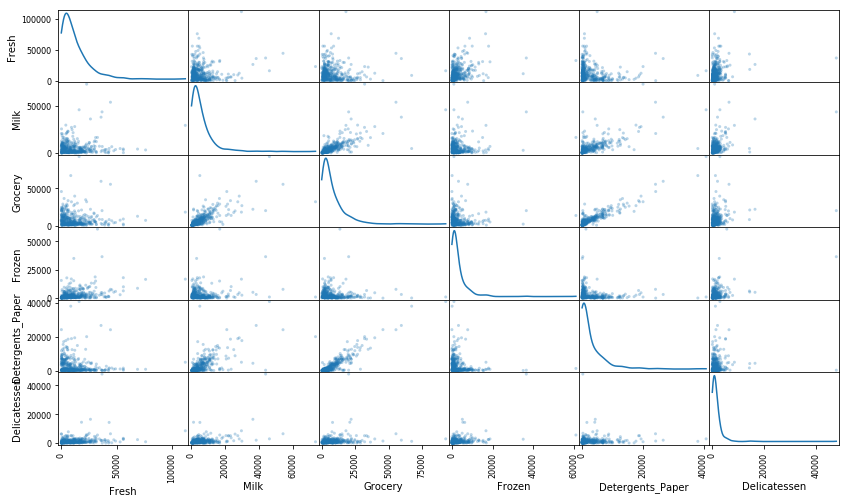

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

When analyzing the scatter matrix, it is immediately clear that the distribution of all of the features are largely skewed to the right, with a mean much greater than the median:

 (Rounded)| Fresh | Milk| Grocery| Frozen| Detergents_Paper| Delicatessen
--- | --- | ---| --- | --- | --- | --- |
**Median** |8504| 3627| 4756| 1526| 817| 966
**Mean** | 12000 | 5796|7951|3072| 2881 | 1525
**Values < 500** | 25 | 14|9|79| 177 | 127


This implies that there are outliers, or a small number of data points that take on very large values that distort the distribution and might be detrimental towards identifying consumer segments. As demonstrated above with Values < 500, some of the features also seem to have a large number of data points that take on values close to 0, which also tends to skew the graph to the right, as there is a bigger prominance of data points around the origin.

As displayed by the scatter matrix, there seems to be an indication of correlation for some of the features, namely: (Milk, Grocery), (Detergents_Paper, Grocery), (Detergents_Paper, Grocery). This is further confirmed when visualizing the heatmap for the data (Note: I was unsure about how to show the heatmap on this answer box, but I've included the code used.)

```python
crr = data.corr()
import seaborn as sns; sns.set()

ax = sns.heatmap(crr)
```

The heatmap and correlation matrix showed that the Detergents_Paper and Grocery features would've indeed been the ideal removed features, as their variation could be best explained from the other features (high Rˆ2 score) among all features available. This then confirms the initial prediction that Grocery would be a strong candidate for "least relevant" feature.

Like the other features, the data for these two features are largely skewed to the right, with 
the visible presence of outliers that take on very large values. In the case of the Detergents_Paper feature, there is also a considerable number of data points that gravitate towards the origin, meaning several values close to 0.

**

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/anaconda3/envs/mlnd27/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


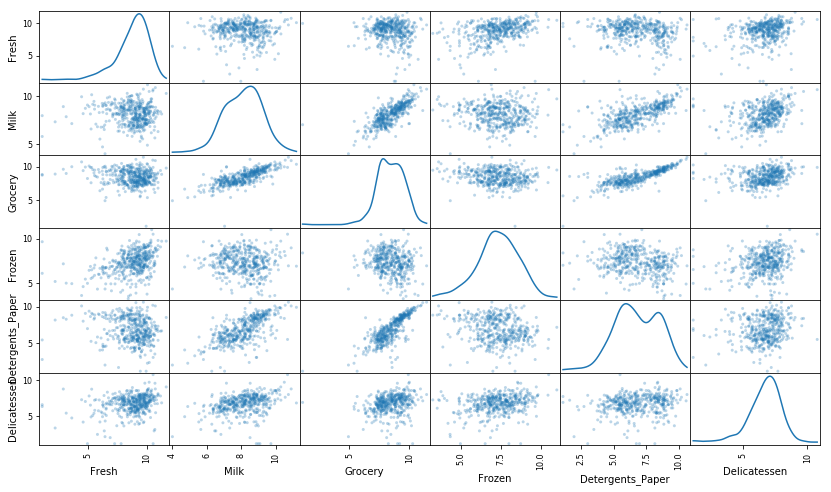

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,10.249096,6.850126,7.671361,8.263848,6.396930,5.598422


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
indices_list = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    outlier_list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    indices = outlier_list.index.tolist()
    indices_list.extend(indices)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
# Counter not shown, but I decided to remove all outliers that had a counter > 1. This counter represents the
# number of times the index appears in the outliers list.

outliers  = [154,128,65,66,75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

There are 5 data points that are considered outliers for more than one feature, based on the definition above. Indexes 154, 128, 65, 66, 75, with 154 appearing 3 times, and the others appearing twice. 

With clustering exercises, outliers can distort the underlying perception of the clusters as they will "pull" the cluster towards them with a weight that might not be a reflection of an actual cluster characteristic. That is, in the case in which the outlier is in fact an abnormal data point with idiosyncratic characteristics that stem away from the general nearby data points, the cluster will be imbued with weighing this idiosyncrasy that is not representative of the actual cluster. When these outliers are removed, the tendency is that the clusters more accurately represent common underlying characteristics, and in this case, more accurate customer segments. The tables above point towards the presence of several additional outliers, however, outliers for only one feature, in this case, can still be considered useful information for the cluster definitions, although this consideration is rather subjective and is subject to more experimentation as the algorithm is tuned. In the case these outliers are true for more than one feature, the loss function could end up being too high, for example in the case of K-means, and perhaps mislabeling a centroid to account for some idiosyncratic factor, and not an underlying general data characteristic. However, this cut-off is still fairly arbitrary and the two datasets, with and without outliers, should still be compared further on in order to verify the validity of these claims and whether the customer segments end up being better defined or not. 

**

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

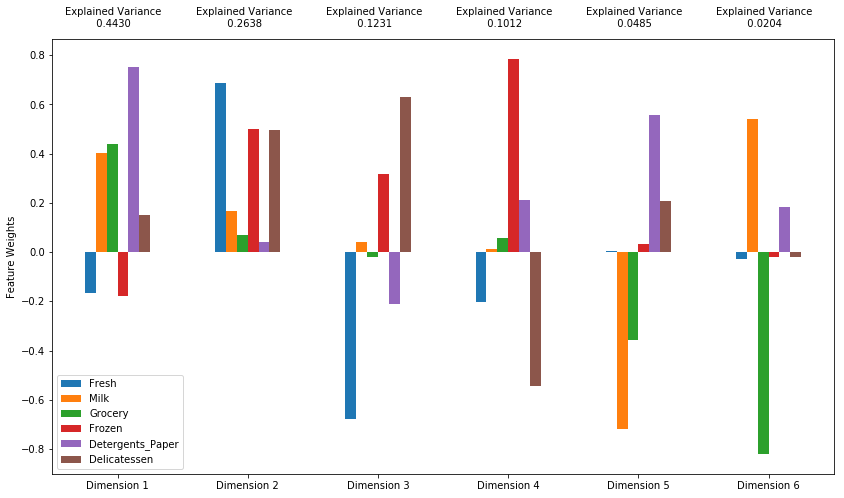

In [14]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

As seen by the graph above, the first and second principal components combined explain approximately 70.7% of the total variance in the data.

The first four principal components explain approximately 93.1% of the total data variance.

```python
print pca.explained_variance_ratio_.cumsum() # Code used
```

As pictured by the graph above, each component consists of a weighted comebination of each of the features. This implies that given the variance explained by the dimension and the allocated weights for each feature, it is possible to visualize the "importance" attributed to each feature in the explanation of some of the data variance. For example, for the first dimension with an explained variance of approximately 44.3%, it is clear that the features that are most affecting this variance comprehension are, in order, Detergents_Paper, Grocery, and Milk. This is deduced from the weight that the component gives to each feature, the greater the weight (in absolute terms), the more impact the feature has on the explained variance. It is worth noting that what can be interpreted as important towards understanding the data variance for the component is the absolute value of the weight, that is, if a negative-weighted feature has a large value, this means that it bears importance in the variance explanation albeit having a negative impact on the component's value. This means that the least relevant features for the component will have a small weight in absolute value.

For the second dimension, we can see that the features that pose the most influence on the component's value are Fresh, Frozen, and Delicatessen, which did not have large weight values for the first component. The total variance explained percentage of around 26.4%, although still fairly substantial, imply that these features are not as important in the explanation of the total variance as opposed to the features present with greater weights in the first component.

For the third dimension, with an explained variance of approximately 12.3%, the features with greatest weights are Delicatessen and Fresh. Important to note that Fresh has a very large negative weight, which, as explained previously, is still an indication of substantial importance towards the definition of the component value.

For the fourth dimension, with an explained variance of about 10.1%, poses the greatest weights to the Frozen and Delicatessen features. Once again, although Delicatessen has a negative weight, its large value is still an indication of significant important towards the calculation of the component's value.

**

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.2146,-1.7988,-3.2371,0.3088,-0.5148,-0.0568
1,2.9903,0.3645,0.2521,1.5653,-0.1922,-0.1244
2,-1.7408,0.6588,-1.3480,0.8847,0.7810,-0.1574


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [18]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data) 

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples) 

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [19]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.2146,-1.7988
1,2.9903,0.3645
2,-1.7408,0.6588


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

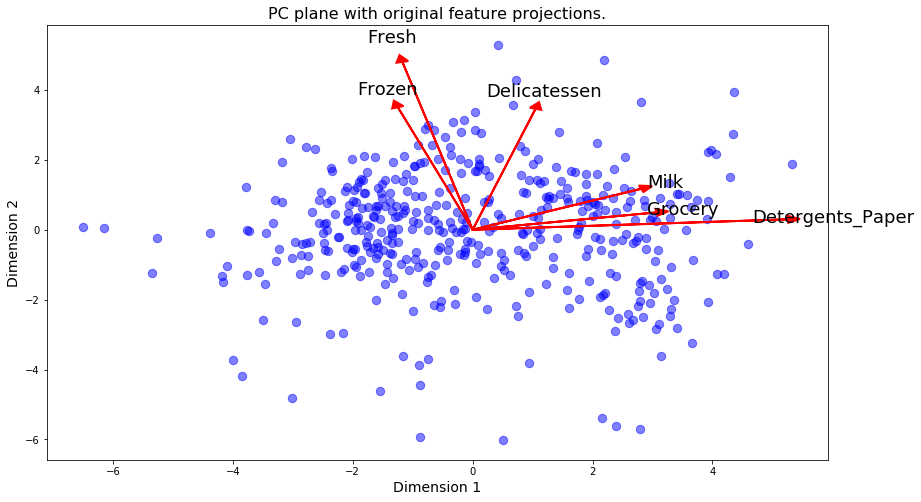

In [20]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The K-means clustering algorithm tends to have a fast training time, scaling well with large datasets, and calculates clusters by minimizing the sum of squared distances between the points in the cluster and its centroid. The algorithm then sets to define k clusters, k being a pre-determined number, of equal variance. K-means has a hard clustering characteristic, that is, each data point is assigned to one specified cluster. This in turn means that the interpretation is fairly straighforward, the clusters have clearly defined separations and the data points inside each cluster then represent some specific segment.

The Gaussian Mixture Model allows for soft clustering, that is, the data points are probabilistically assigned to the relevant clusters. This means that the data points will not necessarily be strictly confined to one cluster or segment, but will be associated with having different probabilities of belonging to different clusters. This flexibility comes with a trade-off of an increased complexity during the training of the data and implies longer training times for datasets with large amounts of features and data points. This flexibility also allows for different shaped clusters, as opposed to K-means always has circular shapes (distance from the mean/centroid), and can account for clusters of data for more complex data distributions and characteristics.

Given the observations on the wholesale customer data so far, it seems that the flexibility originated from the soft clustering characteristic present in the GMM algorithm could define more specific, and better defined, segments. Given the dataset size is fairly small, the gain in algorithm complexity should not pose too much of a strain in the computational power necessity.

**

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
clusterer = GMM(n_components=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score

for i in range(2,11):
    custom_clusterer = GMM(n_components=i, random_state=42)
    custom_clusterer.fit(reduced_data)
    custom_preds = custom_clusterer.predict(reduced_data)
    custom_score = silhouette_score(reduced_data, custom_preds)
    print "For {} clusters, the associated silhouette score was {:.5}".format(i, custom_score)
    

For 2 clusters, the associated silhouette score was 0.41182
For 3 clusters, the associated silhouette score was 0.37356
For 4 clusters, the associated silhouette score was 0.33139
For 5 clusters, the associated silhouette score was 0.28098
For 6 clusters, the associated silhouette score was 0.27798
For 7 clusters, the associated silhouette score was 0.32254
For 8 clusters, the associated silhouette score was 0.30942
For 9 clusters, the associated silhouette score was 0.31496
For 10 clusters, the associated silhouette score was 0.31764


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

The report of the silhouette scores for clusters for the range of 2 to 10 is displayed above.

The silhouette scores varies from 1 to -1, where 1 is the highest score and -1 the lowest. Give that, the number of clusters that gives the best silhouette score is 2, with a value of 0.41182.

**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

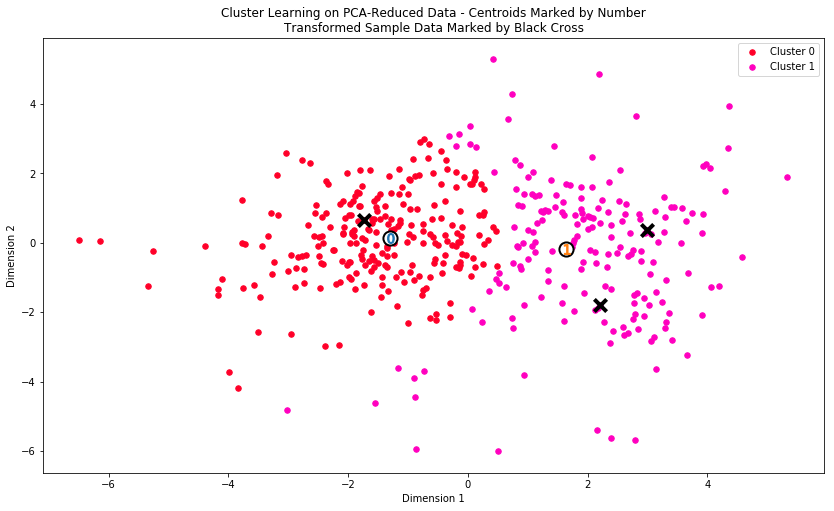

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

There is a fairly clear trend for each Segment, each one gravitates towards annual expenditure on a combination of features, on one side Fresh and Frozen and on the other side Milk, Grocery, and Detergents_Paper, with Delicatessen being somewhat close between both centers. This could be interpreted as some general characteristics for the different Segments. 

Segment 0 could indicate a customer segmentation of more restaurant-like establishments given the greater expenditure on Fresh food, which as discussed previously implies a necessity for consumables that have a low time span validity, such as is the case for ingredients, and for Frozen, which could imply items such as meats. The very low value for the Detergents_Paper feature also implies there is likely no reselling of these items, they are likely purchased for the establishment's own consumption.

For Segment 1, given the large values for Milk, Grocery and Detergents_Paper, the probable type of establishment for this Cluster is that of a market/retailer. For the following features: Milk, Grocery, and Detergents_Paper, each value lies on one side of the mean, either above or below. For Fresh, Frozen, and Delicatessen, both values were lower than the mean, which could be an indication of how the skewness of the distribution could be affecting the data's mean.

**

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

The sample point predictions are very much in line with the final Cluster definitions.

Segment 0 was defined as being a cluster more resemblant of a restaurant like establishment, while Segment 1 was defined as having more market/retail like characteristics.

Sample point 0 was predicted to belong to a class of Natural Foods like market, and Sample point 1 was predicted to be a grocery store, both correctly fall within the idea presented for Segment 1. Sample point 2 was predicted to be some kind of restaurant, exactly what the Segment 0 seems to represent.

**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

In possession of this information about customer segmentation among the current available customers, the A/B testing can be more directed. In order to correctly measure how each customer segment reacts to the change in delivery frequency, 2 random samples would be taken from each Segment, for these samples the delivery frequency would be altered. This would allow for the wholesale distributor to grasp the different reactions based on the Segments, after some pre-established time period, 2-3 weeks for example, the wholesale distributor would take on feedback from these groups, and gage how they react to the change. The control group for this case would be the customers from both segments that were left with the previous delivery scheme.

As a hypothesis for the experiment, I believe that customers from segment 0, with a greater preponderance of Fresh purchases, would benefit most from the original 5 times a week delivery scheme and disapprove the new lower frequency, as they will likely prefer to have the fresh foods delivered more frequently. This could be then correctly understood with this segmented A/B testing format as the feedback from the sample from this particular Segment could then be analyzed. Of course if both samples' feedback turn out negative, it would indicate that the change should probably be reverted.

**

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

In possession of this new engineered feature, the new customers could be predicted with the usage of a supervised learner that takes on the target variable as being this segment classification. In this case, this new feature would be as simple as a binomial classification for each data point that could take on 0 if it belongs to Segment 0 and 1 for Segment 1. Taking this as the label for the classifier, it would then be able to predict, given the already known product spending features. Of course this prediction would follow the usual procedure, splitting the data in training and testing, fitting and testing to see whether the algorithm does a good job predicting the test data, and if it has a good enough score, it could be used to predict, with good accuracy, the segment for the new customers.

**

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

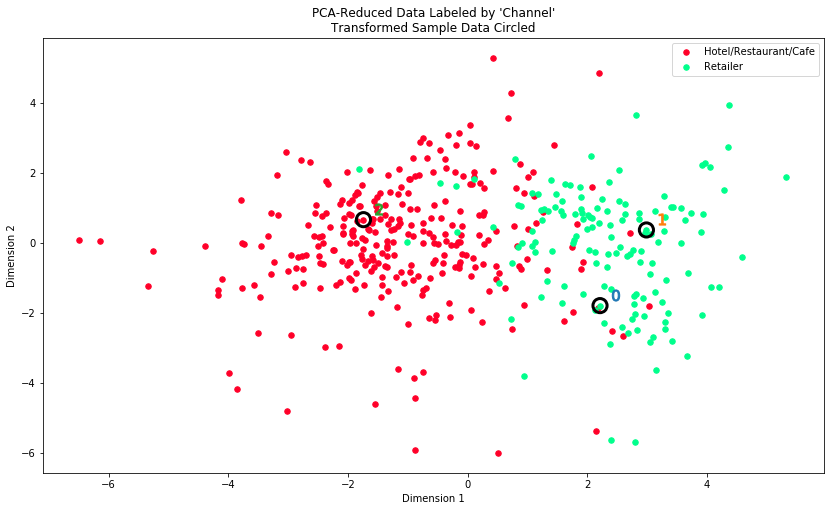

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

The clustering algorithm does a very good job in splitting the data between these two segments, Hotel/Restaurant/Cafe and Retailer. As predicted previously, the Segment 0, in red would be associated to restaurant like establishments, and Segment 1 would be markets/retailers, which very accurately match the actual distribution. Given the silhouette score, it also correctly separated the data into 2 segments.

The above distribution indicates that there are several points that intertwine between both segments, meaning there apparently is no possibility of a clear "pure" division between the segments.

These classifications are consistent with what was predicted initially for the definition of the customer segments.

**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.